<a href="https://colab.research.google.com/github/EWECORP/DScience_41870/blob/main/Proyecto_ComplementarioI_Eduardo_Ettlin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

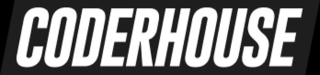

# **CURSO DE DATA SCIENCE**
# Comisión 41870

# **DESAFIO Complementario - EVALUANDO PROYECTOS DE ML**

*AUTOR: Eduardo Ettlin

Continuarás trabajando con base en lo realizado en el Desafío entregable: **ProyectoDS_Parte_I**, en esta oportunidad deberás complementar con lo siguiente:


1. Continuaremos trabajando con base en lo realizado en el Desafío entregable: Estructurando un proyecto de DS-Parte II y III, en esta oportunidad deberás complementar con lo siguiente:

2. Generar una evaluación de modelos apropiados para el problema de interés

3. Identificar por medio de las métricas generadas si se puede tener una situación de overfitting (sobreajuste) o underfitting (subajuste), discutiendo posibles formas de mejora



**Aspectos a incluir**

El código debe estar hecho en un notebook y debe estar probado.

**Formato**

Entregar un archivo con formato .ipynb. Debe tener el nombre “Proyecto_ComplementarioI_+Apellido.ipynb”  

**Sugerencias**

Preparar el código y probar los resultados con subconjuntos del conjunto original.


In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


# **DATASET ELEGIDO:**

Link de acceso al sitio de Kaggle: https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents
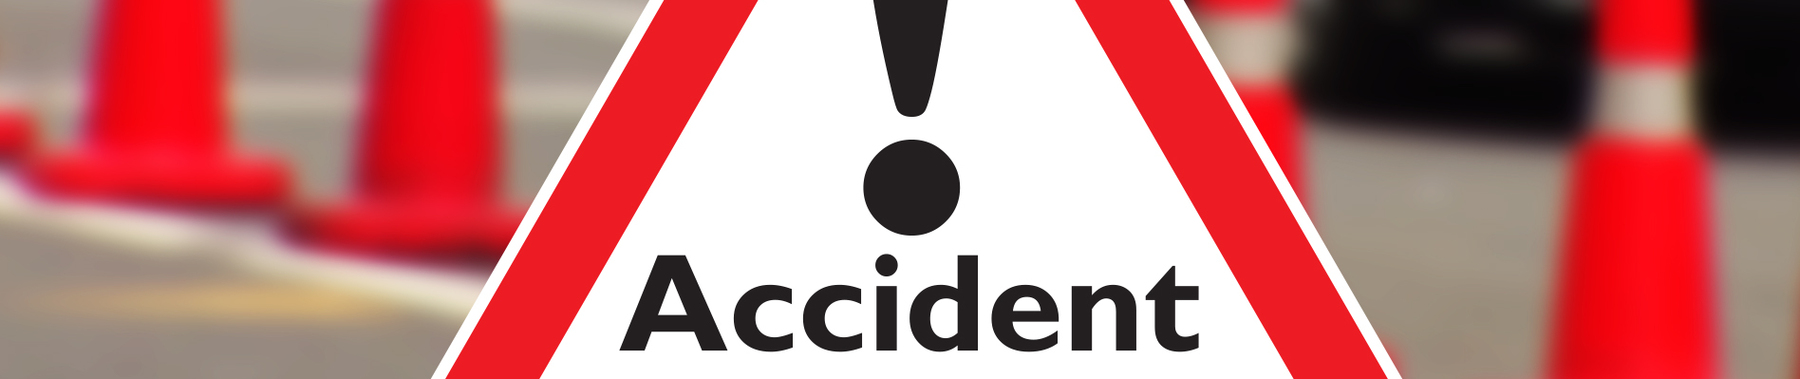


Contiene la información sobre accidentes en las principales ciudades de EE. UU. Posee una gran cantidad de variables que podrían relacionar causas y efectos de accidentes.



# **Paquetes Utilizados**

Se importan los paquetes necesarios

In [ ]:
import statsmodels.formula.api as sm #regresion lineal
import warnings
warnings.filterwarnings("ignore")

# manejo de data
import pandas as pd
#pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.3f}'.format
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import numpy as np # algebra lineal

# visualizaciones
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt 

import statsmodels.formula.api as sm #regresion lineal


In [ ]:
! pip install chart_studio -q
! pip install bqplot -q
! pip install pingouin -q   #quiet mode (Sin tanto detalle)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 62.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import chart_studio.plotly     as py

# **Importación del Dataset**

Se importan los datos y se procesan

In [ ]:
full_df =  pd.read_csv('/content/gdrive/MyDrive/DScience_41870/US_Accidents_Dec21_updated.csv', nrows=500000) # Limitar Registros Optimizar Proceso (, nrows=500000) 


**# Se visualizan los primeros datos del Dataframe con sus nombre de columna**

In [ ]:
full_df.head(5)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.100,36.100,58.000,29.760,10.000,SW,10.400,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.103,-84.525,39.102,-84.524,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.000,NaN,97.000,29.700,10.000,Calm,NaN,0.020,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062,-81.538,41.062,-81.535,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,Akron,Summit,OH,44311,US,US/Eastern,KAKR,2016-02-08 06:54:00,39.000,NaN,55.000,29.650,10.000,Calm,NaN,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172,-84.493,39.170,-84.502,0.500,At Mitchell Ave/Exit 6 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45217,US,US/Eastern,KLUK,2016-02-08 07:53:00,37.000,29.800,93.000,29.690,10.000,WSW,10.400,0.010,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


### **Se visualiza la tupla de dimensiones de matriz que indica el número de filas y columnas de un DataFrame dado.**



In [ ]:
full_df.shape

(500000, 47)

**Se visualiza La información que contiene el número de columnas, las etiquetas de las columnas, los tipos de datos de las columnas, el uso de la memoria, el índice de rango y el número de celdas en cada columna (valores no nulos).**

In [ ]:
full_df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

# **# Ingeniería de Factores**
## ENRIQUECER DATOS y CAMPOS ADICIONALES ###
Las variables disponibles seleccionadas son:
* Severity
* Temperature(F)
* Wind_Chill(F)
* Precipitation(in)


Se agregan algunas columnas calculadas a partir de los mismos datos sobre todo FECHAS

* Hora
* Año_mes
* Dia_Semana
* Dia_Semana_Nombre




In [ ]:
full_df['Temp'] = full_df['Temperature(F)'] + full_df['Wind_Chill(F)'] # Crear una variable numérica

In [ ]:
full_df['Hora'] = pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.hour  # Extraer la HORA del Día en la cual ocurrió el accidente

In [ ]:
full_df['Anio_Mes'] =  pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m')  # Extraer AÑO y MES

In [ ]:
full_df['day_of_week'] = pd.to_datetime( full_df['Start_Time'],format='%Y-%m-%d %H:%M:%S').dt.dayofweek  # Dia de la Semana

In [ ]:
days = {0:'Lunes',1:'Martes',2:'Miércoeles',3:'Jueves',4:'Viernes',5:'Sabado',6:'Domingo'}   # Nombre del Día de la Semana
full_df['day_of_week_lbl'] = full_df['day_of_week'].apply(lambda x: days[x])

In [ ]:
full_df['Trimestre'] = pd.to_datetime(full_df['Start_Time']).dt.quarter

In [ ]:
full_df.head(3)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Temp,Hora,Anio_Mes,day_of_week,day_of_week_lbl,Trimestre
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.109,-83.093,40.112,-83.032,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,Dublin,Franklin,OH,43017,US,US/Eastern,KOSU,2016-02-08 00:53:00,42.100,36.100,58.000,29.760,10.000,SW,10.400,0.000,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,78.200,0,2016-02,0,Lunes,1
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865,-84.063,39.865,-84.049,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900,NaN,91.000,29.680,10.000,Calm,NaN,0.020,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,NaN,5,2016-02,0,Lunes,1
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.103,-84.525,39.102,-84.524,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,Cincinnati,Hamilton,OH,45203,US,US/Eastern,KLUK,2016-02-08 05:53:00,36.000,NaN,97.000,29.700,10.000,Calm,NaN,0.020,Overcast,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,Night,Night,Day,NaN,6,2016-02,0,Lunes,1


##¿Hay muchas columnas en 0?


In [ ]:
full_df.fillna(0, inplace=True)   # Se reemplazan los valores nulos por 0

In [ ]:
cols = full_df[full_df == 0].count(axis=0)
cols[cols > 0]

Distance(mi)              15607
Number                   325677
City                         35
Zipcode                     238
Timezone                    449
Airport_Code               1460
Weather_Timestamp          6699
Temperature(F)            10620
Wind_Chill(F)            199286
Humidity(%)               11047
Pressure(in)               8826
Visibility(mi)            11732
Wind_Direction             9131
Wind_Speed(mph)           92663
Precipitation(in)        467242
Weather_Condition         11411
Amenity                  495363
Bump                     499869
Crossing                 468684
Give_Way                 498728
Junction                 434959
No_Exit                  499258
Railway                  496324
Roundabout               499982
Station                  489538
Stop                     492221
Traffic_Calming          499762
Traffic_Signal           459012
Turning_Loop             500000
Sunrise_Sunset              600
Civil_Twilight              600
Nautical

In [ ]:
full_df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Temp,Hora,day_of_week,Trimestre
count,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000,500000.000
mean,2.211,36.227,-95.291,36.227,-95.291,0.787,2559.297,63.780,36.939,62.138,29.131,9.021,7.281,0.007,74.713,12.692,2.605,2.855
std,0.545,5.274,17.781,5.274,17.780,1.596,9238.677,19.857,34.446,24.098,4.002,3.016,5.699,0.131,68.604,5.314,1.800,1.049
min,2.000,24.570,-124.548,24.570,-124.546,0.000,0.000,-22.000,-44.000,0.000,0.000,0.000,0.000,0.000,-63.000,0.000,0.000,1.000
25%,2.000,33.340,-117.495,33.342,-117.494,0.114,0.000,53.100,0.000,46.000,29.570,10.000,3.500,0.000,0.000,8.000,1.000,2.000
50%,2.000,36.141,-88.006,36.141,-88.006,0.363,0.000,66.900,38.400,64.000,29.910,10.000,6.900,0.000,81.000,14.000,3.000,3.000
75%,2.000,40.237,-80.324,40.238,-80.324,0.821,1483.000,78.000,70.000,82.000,30.050,10.000,10.400,0.000,140.000,17.000,4.000,4.000
max,4.000,49.001,-67.113,49.075,-67.109,151.525,961051.000,196.000,196.000,100.000,56.540,111.000,822.800,24.000,392.000,23.000,6.000,4.000


## Identificación y Tratamiento de OUTLIERS

Recordemos que tenemos 2.845.342 casos, por lo cual hay variables con una cantidad muy chica de ceros, y otras con una cantidad importante. La pregunta a responder es: Son estos ceros valores posibles de la variable o datos faltantes codificados asi?.

# **# Feature Selección**
## Elección de Variables RELEVANTES ###

No todas las variables explican el problema que queremos modelar y la elección de las mejores, las cuales alimentarán nuestros algoritmos, es el paso más importante que dictará la calidad máxima que podremos conseguir.


*   **Distancias:** No es relevante por ser consecuencia de la gravedad del accidentes. --> Se excluye
*   **State:**  puede ser relevante para las diferencias geográficas de conducción. --> Se incluye



## Reducción del DF para analizar correlación ##


In [ ]:
small_df = full_df[['Severity', 'City', 'County', 'State', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Weather_Condition', 'Hora', 'day_of_week', 'Anio_Mes','Trimestre']]
small_df.head(7)

,Severity,City,County,State,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Weather_Condition,Hora,day_of_week,Anio_Mes,Trimestre
0,3,Dublin,Franklin,OH,3.230,42.100,36.100,58.000,29.760,10.000,Light Rain,0,0,2016-02,1
1,2,Dayton,Montgomery,OH,0.747,36.900,0.000,91.000,29.680,10.000,Light Rain,5,0,2016-02,1
2,2,Cincinnati,Hamilton,OH,0.055,36.000,0.000,97.000,29.700,10.000,Overcast,6,0,2016-02,1
3,2,Akron,Summit,OH,0.123,39.000,0.000,55.000,29.650,10.000,Overcast,6,0,2016-02,1
4,3,Cincinnati,Hamilton,OH,0.500,37.000,29.800,93.000,29.690,10.000,Light Rain,7,0,2016-02,1
5,2,Williamsburg,Clermont,OH,1.427,35.600,29.200,100.000,29.660,10.000,Overcast,8,0,2016-02,1
6,2,Dayton,Montgomery,OH,0.227,33.800,0.000,100.000,29.630,3.000,Mostly Cloudy,8,0,2016-02,1


In [ ]:
small_df.corr()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Hora,day_of_week,Trimestre
Severity,1.000,0.116,-0.070,-0.294,0.034,0.014,-0.004,-0.042,0.018,-0.116
Distance(mi),0.116,1.000,-0.065,0.003,0.008,-0.035,-0.042,-0.037,0.026,-0.007
Temperature(F),-0.070,-0.065,1.000,0.313,-0.107,0.415,0.311,0.162,-0.003,-0.019
Wind_Chill(F),-0.294,0.003,0.313,1.000,-0.010,0.086,0.077,0.106,0.134,0.201
Humidity(%),0.034,0.008,-0.107,-0.010,1.000,0.340,-0.159,-0.237,-0.003,0.065
Pressure(in),0.014,-0.035,0.415,0.086,0.340,1.000,0.380,-0.011,-0.021,-0.021
Visibility(mi),-0.004,-0.042,0.311,0.077,-0.159,0.380,1.000,0.065,-0.009,-0.023
Hora,-0.042,-0.037,0.162,0.106,-0.237,-0.011,0.065,1.000,0.010,0.056
day_of_week,0.018,0.026,-0.003,0.134,-0.003,-0.021,-0.009,0.010,1.000,0.043
Trimestre,-0.116,-0.007,-0.019,0.201,0.065,-0.021,-0.023,0.056,0.043,1.000


## Correlación Básica con HEAT MAP ##

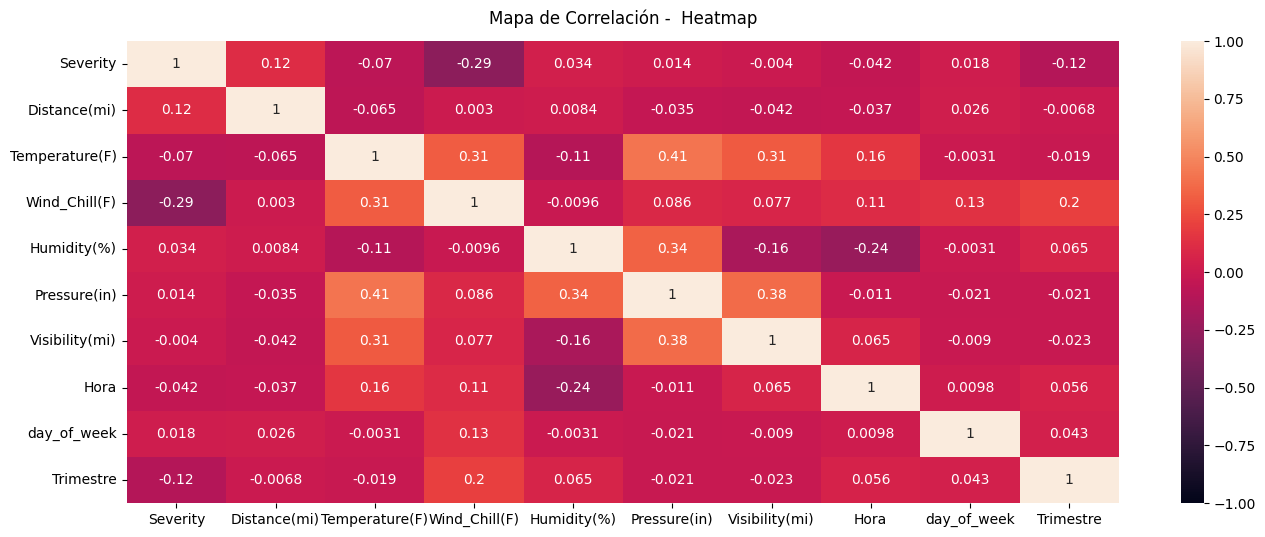

In [ ]:
# Definir el Tamaplo
plt.figure(figsize=(16, 6))

# Archivar el heatmap object en una variable para manejar mejor las propiedades.
# Cambiar los valores del grafico. Colores entre  -1 y 1, y setear las anotaciones para ver las correlaciones.
heatmap = sns.heatmap(small_df.corr(), vmin=-1, vmax=1, annot=True)

# Ponérle un Tículo al mapa. 
heatmap.set_title('Mapa de Correlación -  Heatmap', fontdict={'fontsize':12}, pad=12);

## VARIABLE DE ANÁLISIS ##

**Severidad**

Se quiere analizar si severidad tiene factores que se correlacionan

SEVERIDAD tiene 4 categorías que funcionan como etiquetas.

La curva de recuperación de precisión no es compatible con la configuración de múltiples etiquetas. Sin embargo, uno puede decidir cómo manejar este caso. 

#Extraer Campor NUMERICOS#

Data Frame de Valóres Numéricos
Reemplazar Nulos
Quitar Duplicados


In [ ]:
df_num = small_df.select_dtypes('number') # datos númericos
df_num.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Hora,day_of_week,Trimestre
0,3,3.230,42.100,36.100,58.000,29.760,10.000,0,0,1
1,2,0.747,36.900,0.000,91.000,29.680,10.000,5,0,1
2,2,0.055,36.000,0.000,97.000,29.700,10.000,6,0,1
3,2,0.123,39.000,0.000,55.000,29.650,10.000,6,0,1
4,3,0.500,37.000,29.800,93.000,29.690,10.000,7,0,1


In [ ]:
# split del dataset
from sklearn.model_selection import train_test_split

In [ ]:
# separamos las caracteristicas/features del target
X = df_num
y = df_num['Severity']
X = X.drop('Severity', axis=1)

X.fillna(0, inplace=True)   # Se reemplazan los valores nulos por 0

X


,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Hora,day_of_week,Trimestre
0,3.230,42.100,36.100,58.000,29.760,10.000,0,0,1
1,0.747,36.900,0.000,91.000,29.680,10.000,5,0,1
2,0.055,36.000,0.000,97.000,29.700,10.000,6,0,1
3,0.123,39.000,0.000,55.000,29.650,10.000,6,0,1
4,0.500,37.000,29.800,93.000,29.690,10.000,7,0,1
...,...,...,...,...,...,...,...,...,...
499995,0.650,77.000,77.000,44.000,28.380,10.000,1,2,3
499996,0.074,35.000,27.000,65.000,29.240,10.000,8,1,4
499997,0.050,54.000,54.000,97.000,29.110,2.000,22,6,4
499998,2.256,74.000,74.000,55.000,29.880,9.000,14,1,2


In [ ]:
y

0         3
1         2
2         2
3         2
4         3
         ..
499995    2
499996    2
499997    2
499998    2
499999    2
Name: Severity, Length: 500000, dtype: int64

### **ENTRENAMIENTO DE MODELOS**

In [ ]:
# train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=33,
                                                    stratify= y)


print('Tamaño del set de entrenamiento:', X_train.shape)
print('Tamaño del set de testeo:', X_test.shape)

Tamaño del set de entrenamiento: (400000, 9)
Tamaño del set de testeo: (100000, 9)


In [ ]:
X_train

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Hora,day_of_week,Trimestre
336245,0.178,54.000,54.000,75.000,29.240,10.000,0,2,4
466628,0.196,73.000,73.000,57.000,29.820,10.000,8,0,2
6895,0.265,82.000,0.000,17.000,29.930,10.000,13,2,2
118739,0.647,70.500,0.000,50.000,29.930,10.000,16,1,3
370169,0.899,73.000,73.000,68.000,29.720,10.000,10,4,3
...,...,...,...,...,...,...,...,...,...
71659,0.449,84.000,0.000,63.000,29.780,10.000,13,5,3
110226,0.380,57.000,0.000,89.000,30.010,7.000,16,2,1
142919,0.009,59.000,0.000,59.000,30.080,10.000,17,2,1
329009,0.014,70.000,70.000,87.000,29.210,10.000,7,5,2


### Árbol de Decisión:
Pros:
-------
* alta capacidad de explicar la decisión
* aceptan variables categóricas

Contras:
-----------
* necesitan data balanceada
* tienen a sobre ajuste (Se vera en la sig Clase)

In [ ]:
# modelos
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Paso 1: Instanciar el objeto/modelo
tree_model = DecisionTreeClassifier(random_state = 0, class_weight='balanced')

In [ ]:
# entrenamiento
#Paso 2: Ajustar el modelo con los datos
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=0)

In [ ]:
# predicciones
# Paso 3: Predecir
y_pred = tree_model.predict(X_test)
y_pred_train = tree_model.predict(X_train)

In [ ]:
X_test.shape, y_test.shape

((100000, 8), (100000,))

In [ ]:
X_test

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Hora,day_of_week,Trimestre
298515,0.334,69.000,69.000,84.000,29.990,10.000,16,0,4
498780,0.678,45.000,43.000,42.000,30.380,10.000,19,4,4
380712,0.326,67.000,67.000,39.000,29.300,10.000,15,2,3
21422,1.488,75.900,0.000,94.000,30.030,10.000,8,3,3
428721,0.218,74.000,74.000,34.000,29.460,10.000,15,4,3
...,...,...,...,...,...,...,...,...,...
196419,0.691,55.400,0.000,77.000,30.090,10.000,8,2,2
126239,0.760,84.900,0.000,44.000,29.870,10.000,16,4,3
415567,0.115,84.000,84.000,76.000,29.470,10.000,12,6,3
342787,0.021,81.000,81.000,67.000,29.360,10.000,16,4,3


In [ ]:
y_pred[:10]

array([2, 2, 2, 2, 2, 2, 4, 2, 2, 2])

In [ ]:
y_test[:10].values

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# evaluacion 
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
recall = recall_score(y_train, y_pred_train, average='micro')
precision = precision_score(y_train, y_pred_train, average='micro')
acc = accuracy_score(y_train, y_pred_train)
f1 = f1_score(y_train, y_pred_train, average='micro')

print('METRICAS TRAIN:')
print('Recall: {:.4f}'.format(recall))
print('Precision: {:.4f}'.format(precision))
print('F1: {:.4f}'.format(f1))
print('Accuracy: {:.4f}'.format(acc))

METRICAS TRAIN:
Recall: 0.9989
Precision: 0.9989
F1: 0.9989
Accuracy: 0.9989


In [ ]:
matriz = confusion_matrix(y_test, y_pred)
matriz

array([[76928,  4765,  3761],
       [ 4897,  2238,   863],
       [ 3070,   741,  2737]])

In [ ]:
y_test.value_counts()

2    85454
3     7998
4     6548
Name: Severity, dtype: int64

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.91      0.90      0.90     85454
           3       0.29      0.28      0.28      7998
           4       0.37      0.42      0.39      6548

    accuracy                           0.82    100000
   macro avg       0.52      0.53      0.53    100000
weighted avg       0.82      0.82      0.82    100000



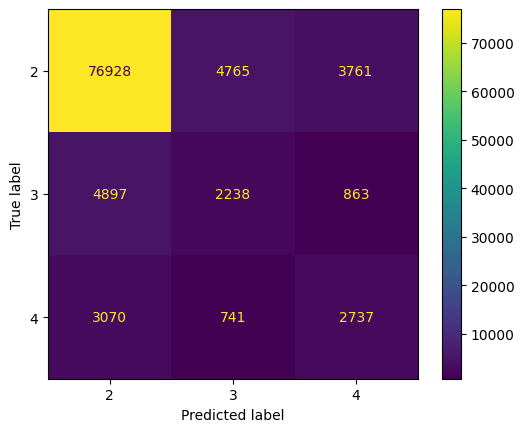

In [ ]:

cm = confusion_matrix(y_test, y_pred, labels=tree_model.classes_)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_).plot()


### Feature importance

In [ ]:
tree_model.feature_importances_

array([0.22144603, 0.11898688, 0.17959278, 0.12520606, 0.15557847,
       0.0287797 , 0.07990374, 0.06058346, 0.02992287])

In [ ]:
df_importancia = pd.DataFrame({'Variable': X_train.columns.values.tolist(),
                               'Importancia': tree_model.feature_importances_}).sort_values(by='Importancia', ascending=False)

df_importancia

,Variable,Importancia
0,Distance(mi),0.221
2,Wind_Chill(F),0.180
4,Pressure(in),0.156
3,Humidity(%),0.125
1,Temperature(F),0.119
6,Hora,0.080
7,day_of_week,0.061
8,Trimestre,0.030
5,Visibility(mi),0.029


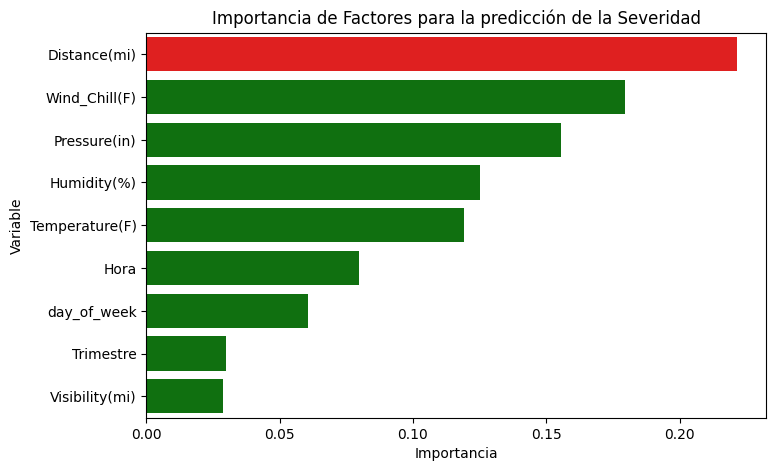

In [ ]:
plt.figure(figsize=(8,5))

values = df_importancia.Importancia    

sns.barplot(y=df_importancia.Variable,
            x=values,
            palette = ['green' if (x < max(values)) else 'red' for x in values ]
           ).set(title='Importancia de Factores para la predicción de la Severidad')

plt.show()

# Forward selection
En la selección hacia adelante, comenzamos con un modelo nulo y luego comenzamos a ajustar el modelo con cada característica individual una a la vez y seleccionamos la característica con el valor p mínimo. Ahora ajuste un modelo con dos características probando combinaciones de la característica seleccionada anteriormente con todas las demás características restantes. Vuelva a seleccionar la función con el valor p mínimo. Ahora ajuste un modelo con tres características probando combinaciones de dos características previamente seleccionadas con otras características restantes. Repita este proceso hasta que tengamos un conjunto de características seleccionadas con un valor p de características individuales menor que el nivel de significancia.

In [ ]:
import statsmodels.api as sm
def forward_selection(data, target, significance_level=0.01):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

In [ ]:
forward_selection(X,y)

['Distance(mi)',
 'Wind_Chill(F)',
 'Trimestre',
 'day_of_week',
 'Pressure(in)',
 'Humidity(%)',
 'Temperature(F)',
 'Visibility(mi)']

# Backward selection
En la eliminación hacia atrás, comenzamos con el modelo completo (incluidas todas las variables independientes) y luego eliminamos la característica insignificante con el valor p más alto (> nivel de significancia). Este proceso se repite una y otra vez hasta que tenemos el conjunto final de características importantes.

In [ ]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

In [ ]:
backward_elimination(X,y)

['Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Hora',
 'day_of_week',
 'Trimestre']

# Eliminación bidireccional (stepwise)
Es similar a la selección hacia adelante, pero la diferencia es que al agregar una nueva característica, también verifica la importancia de las características ya agregadas y si encuentra que alguna de las características ya seleccionadas es insignificante, simplemente elimina esa característica en particular mediante la eliminación hacia atrás.

In [ ]:
def stepwise_selection(data, target,SL_in=0.05,SL_out = 0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break 
        else:
            break
    return best_features

In [48]:
stepwise_selection(X,y)

['Distance(mi)',
 'Wind_Chill(F)',
 'Trimestre',
 'day_of_week',
 'Pressure(in)',
 'Humidity(%)',
 'Temperature(F)',
 'Visibility(mi)']